In [1]:
import os


# Scientific Python Libraries
import pandas as pd
import numpy as np

# Essential libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as mn
from matplotlib.pyplot import show

import warnings
warnings.filterwarnings("ignore")

# Essential  for splitting into train and test data
from sklearn.model_selection import train_test_split   

#Importing the models for classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
# !pip install xgboost
import xgboost as xgb

# Essential libraries for evaluating performance metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import time


### Reading the dataset

In [2]:
data = pd.read_csv('dataset.csv')    # read dataset
data.head(5) 

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


### Analysing the data

In [3]:
data.shape

(11055, 32)

In [4]:
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [5]:
data = data.drop_duplicates()

In [6]:
#dropping index column
data = data.drop('index',axis = 1)
data.shape

(11055, 31)

In [7]:
# Information of all dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IPhaving_IP_Address   11055 non-null  int64
 1   URLURL_Length                11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [8]:
data.columns.to_list()


['having_IPhaving_IP_Address',
 'URLURL_Length',
 'Shortining_Service',
 'having_At_Symbol',
 'double_slash_redirecting',
 'Prefix_Suffix',
 'having_Sub_Domain',
 'SSLfinal_State',
 'Domain_registeration_length',
 'Favicon',
 'port',
 'HTTPS_token',
 'Request_URL',
 'URL_of_Anchor',
 'Links_in_tags',
 'SFH',
 'Submitting_to_email',
 'Abnormal_URL',
 'Redirect',
 'on_mouseover',
 'RightClick',
 'popUpWidnow',
 'Iframe',
 'age_of_domain',
 'DNSRecord',
 'web_traffic',
 'Page_Rank',
 'Google_Index',
 'Links_pointing_to_page',
 'Statistical_report',
 'Result']

In [9]:
data.describe()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Finding the unique values ion each column of the dataset
for col in data.columns:
  print(col,  "unique_val" ,data[col].unique(), len(data[col].unique()))

having_IPhaving_IP_Address unique_val [-1  1] 2
URLURL_Length unique_val [ 1  0 -1] 3
Shortining_Service unique_val [ 1 -1] 2
having_At_Symbol unique_val [ 1 -1] 2
double_slash_redirecting unique_val [-1  1] 2
Prefix_Suffix unique_val [-1  1] 2
having_Sub_Domain unique_val [-1  0  1] 3
SSLfinal_State unique_val [-1  1  0] 3
Domain_registeration_length unique_val [-1  1] 2
Favicon unique_val [ 1 -1] 2
port unique_val [ 1 -1] 2
HTTPS_token unique_val [-1  1] 2
Request_URL unique_val [ 1 -1] 2
URL_of_Anchor unique_val [-1  0  1] 3
Links_in_tags unique_val [ 1 -1  0] 3
SFH unique_val [-1  1  0] 3
Submitting_to_email unique_val [-1  1] 2
Abnormal_URL unique_val [-1  1] 2
Redirect unique_val [0 1] 2
on_mouseover unique_val [ 1 -1] 2
RightClick unique_val [ 1 -1] 2
popUpWidnow unique_val [ 1 -1] 2
Iframe unique_val [ 1 -1] 2
age_of_domain unique_val [-1  1] 2
DNSRecord unique_val [-1  1] 2
web_traffic unique_val [-1  0  1] 3
Page_Rank unique_val [-1  1] 2
Google_Index unique_val [ 1 -1] 2
Lin

## Data Visualization

<AxesSubplot:>

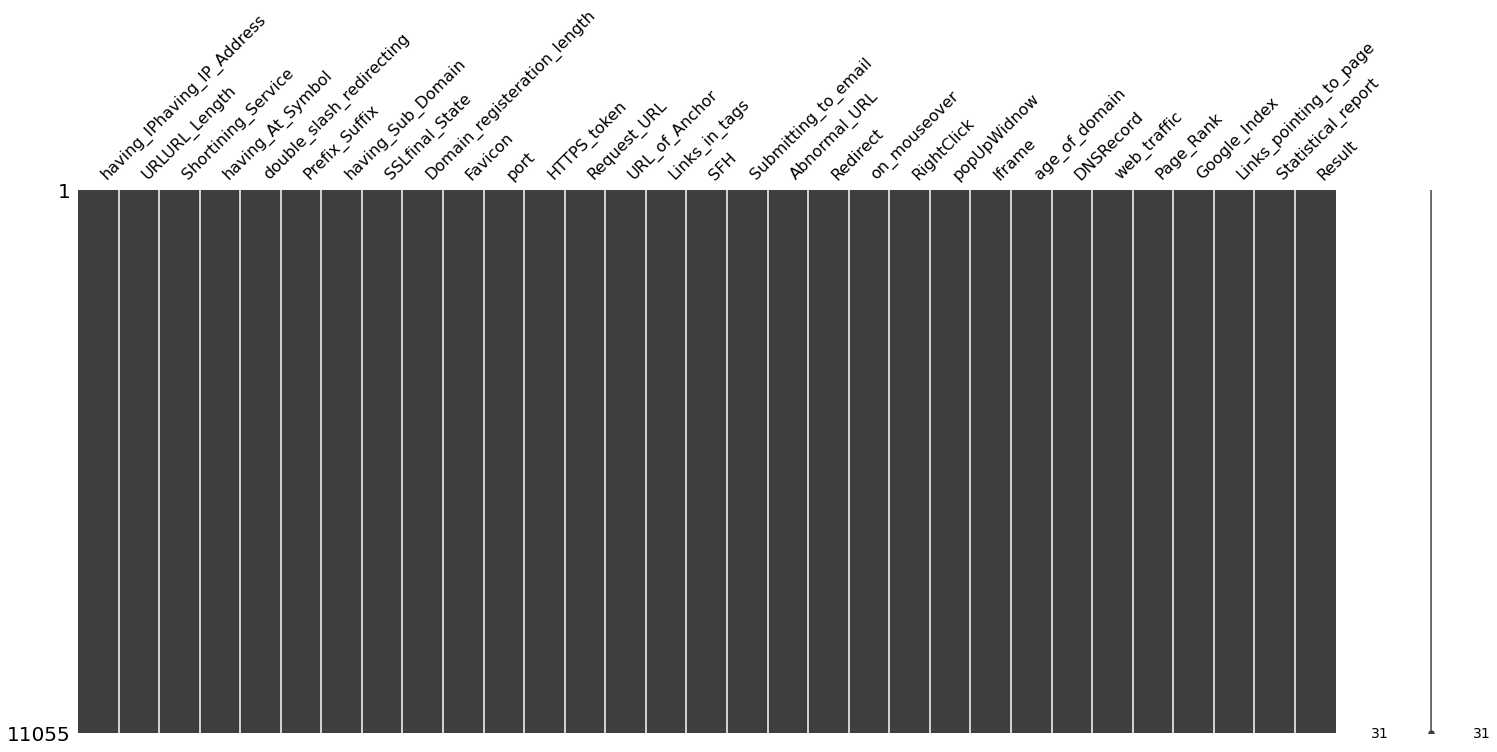

In [11]:
# To check if there are any missing values in the dataset
# !pip install missingno
mn.matrix(data)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Note:</b> There are no null values in the dataset
    </span>    
</div>

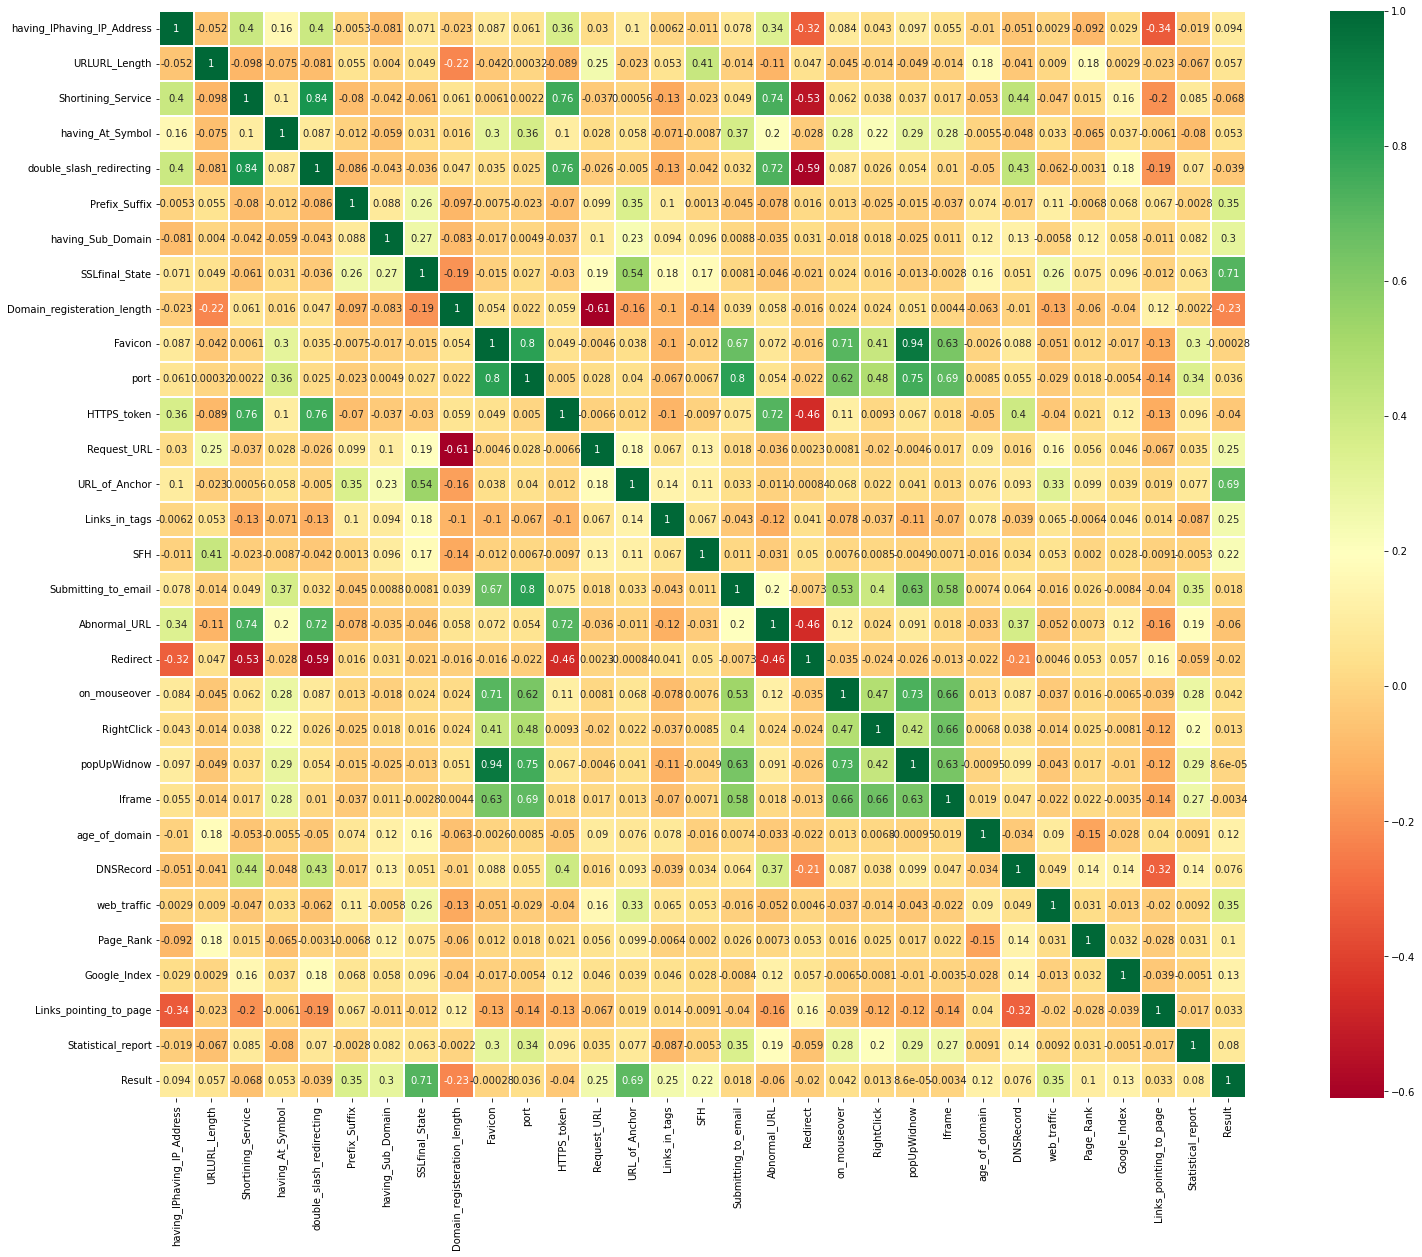

In [12]:
# also checking the correlation of the variables 
plt.figure(figsize = (30,20))
ax= sns.heatmap(data.corr(), annot = True, cmap="RdYlGn",linewidth =2,  square= True)
plt.show()

In [13]:
# Check relationships between 
col_relation = data[['on_mouseover','RightClick','popUpWidnow','Redirect' ]]

<function matplotlib.pyplot.show(close=None, block=None)>

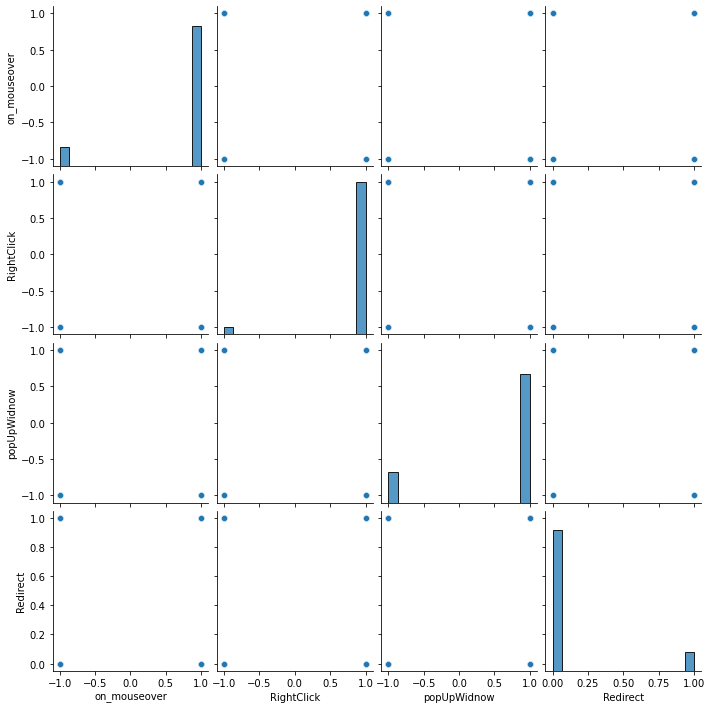

In [14]:
sns.pairplot(col_relation)
plt.show

In [15]:
# function to generate statistics related to Categorical Variables
def categorical_stats(col):
    cat_data = data.groupby(col)['Result'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_data['sum_perc']=cat_data['sum']/data.Result.sum()*100
    cat_data['count_perc']=cat_data['count']/data.Result.count()*100
    return round(cat_data,2)

In [16]:
# function to generate plots related to Categorical Variables
def categorical_plot(col,x,y):
    plt.figure(figsize = (x,y))
  
    axes = sns.countplot(x="Result",hue = col,data=data,palette='Paired')
    plt.title(f'Multiple Bar Plot of {col} v/s Result')    # Title of plot
    
    show()
    return

In [17]:
categorical_stats('popUpWidnow')

,sum,mean,count,sum_perc,count_perc
popUpWidnow,,,,,
1,1016,0.11,8918,80.7,80.67
-1,243,0.11,2137,19.3,19.33


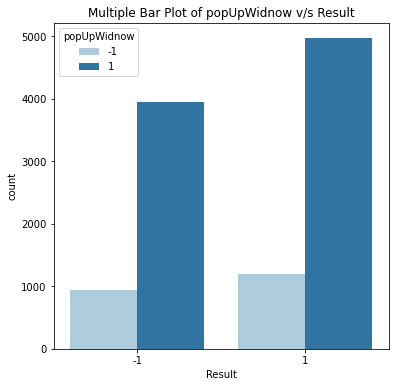

In [18]:
categorical_plot('popUpWidnow',6,6)

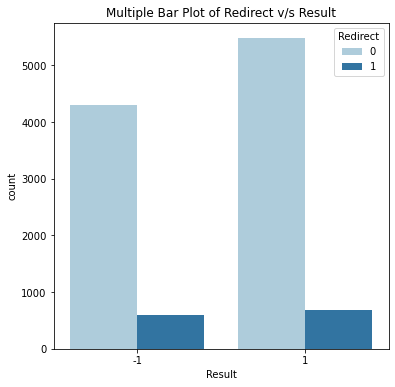

In [19]:
categorical_plot('Redirect',6,6)

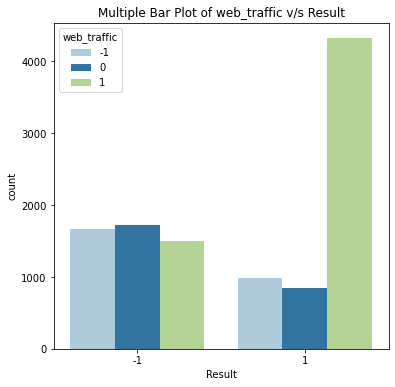

In [20]:
categorical_plot('web_traffic',6,6)

### Encoding the data

In [21]:
from sklearn.preprocessing import LabelEncoder

# Creating an object of the label encoder class
labelencoder = LabelEncoder()

# Applying the labelencoder object on the columns
encoded_data = data.apply(labelencoder.fit_transform)


In [22]:
encoded_data.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,2,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,2,0,0
1,1,2,1,1,1,0,1,2,0,1,...,1,1,0,0,1,0,1,2,1,0
2,1,1,1,1,1,0,0,0,0,1,...,1,1,1,0,2,0,1,1,0,0
3,1,1,1,1,1,0,0,0,1,1,...,1,1,0,0,2,0,1,0,1,0
4,1,1,0,1,1,0,2,2,0,1,...,0,1,0,0,1,0,1,2,1,1


In [23]:
# Finding the unique values ion each column of the dataset
for col in encoded_data.columns:
  print(col,  "unique_val" ,encoded_data[col].unique(), len(encoded_data[col].unique()))

having_IPhaving_IP_Address unique_val [0 1] 2
URLURL_Length unique_val [2 1 0] 3
Shortining_Service unique_val [1 0] 2
having_At_Symbol unique_val [1 0] 2
double_slash_redirecting unique_val [0 1] 2
Prefix_Suffix unique_val [0 1] 2
having_Sub_Domain unique_val [0 1 2] 3
SSLfinal_State unique_val [0 2 1] 3
Domain_registeration_length unique_val [0 1] 2
Favicon unique_val [1 0] 2
port unique_val [1 0] 2
HTTPS_token unique_val [0 1] 2
Request_URL unique_val [1 0] 2
URL_of_Anchor unique_val [0 1 2] 3
Links_in_tags unique_val [2 0 1] 3
SFH unique_val [0 2 1] 3
Submitting_to_email unique_val [0 1] 2
Abnormal_URL unique_val [0 1] 2
Redirect unique_val [0 1] 2
on_mouseover unique_val [1 0] 2
RightClick unique_val [1 0] 2
popUpWidnow unique_val [1 0] 2
Iframe unique_val [1 0] 2
age_of_domain unique_val [0 1] 2
DNSRecord unique_val [0 1] 2
web_traffic unique_val [0 1 2] 3
Page_Rank unique_val [0 1] 2
Google_Index unique_val [1 0] 2
Links_pointing_to_page unique_val [2 1 0] 3
Statistical_report u

In [24]:
# function to generate statistics related to Categorical Variables
def categorical_stats_enc(col):
    cat_data = encoded_data.groupby(col)['Result'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_data['sum_perc']=cat_data['sum']/encoded_data.Result.sum()*100
    cat_data['count_perc']=cat_data['count']/encoded_data.Result.count()*100
    return round(cat_data,2)

In [25]:
# function to generate plots related to Categorical Variables
def categorical_plot_enc(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)

    axes = sns.countplot(x="Result",hue = col,data=encoded_data,palette='Paired')
    plt.title(f'Multiple Bar Plot of {col} v/s Result on basis of count')    # Title of plot
    
    plt.subplot(1,2,2)
    sns.barplot(col,'Result',data=encoded_data, hue='HTTPS_token',palette='Paired')
    plt.legend(labels=['0', '1'])
    plt.title(f'Multiple Bar Plot of {col} v/s Result on basis of HTTPS_token')    # Title of plot

    show()
    return

In [26]:
categorical_stats_enc('popUpWidnow') 

,sum,mean,count,sum_perc,count_perc
popUpWidnow,,,,,
1,4967,0.56,8918,80.67,80.67
0,1190,0.56,2137,19.33,19.33


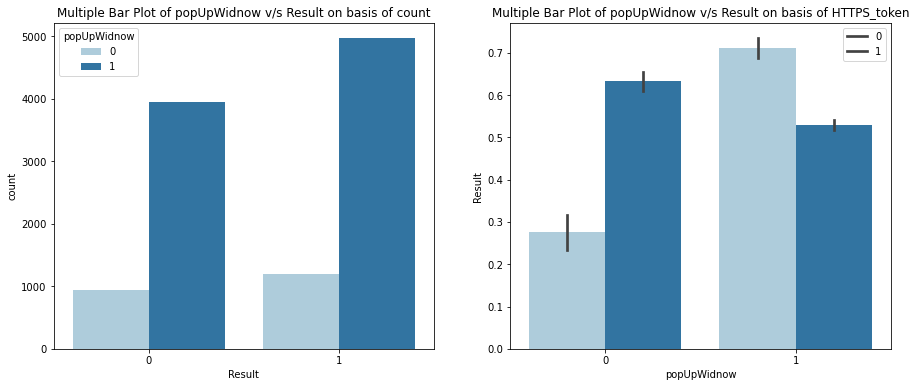

In [27]:
categorical_plot_enc('popUpWidnow',15,6)

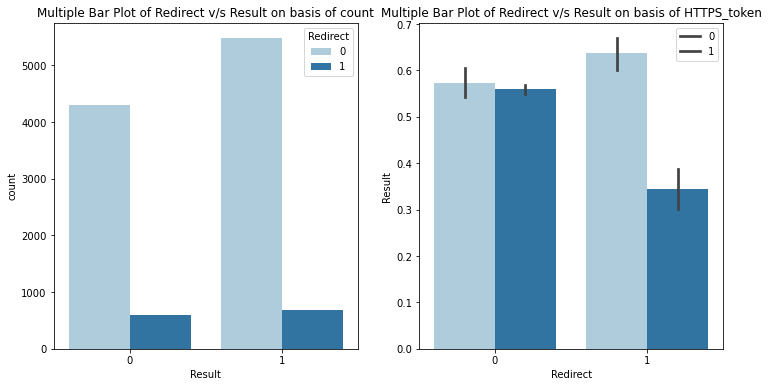

In [28]:
categorical_plot_enc('Redirect',12,6)

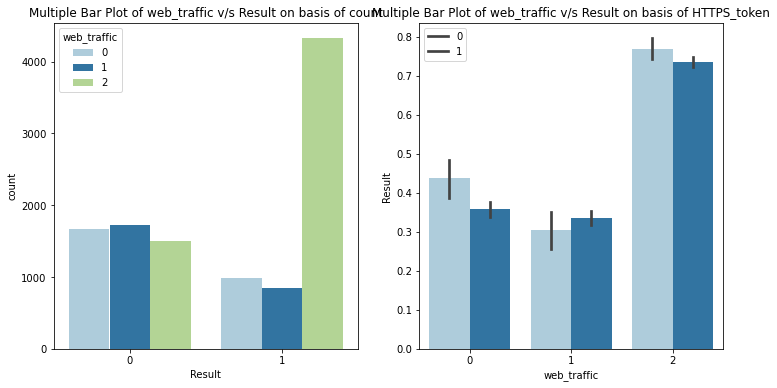

In [29]:
categorical_plot_enc('web_traffic',12,6)

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            The above graphs show that the Count for Phishing website is maximum compared to Non-Phishing website
        </p>
    </span>    
</div>

In [30]:
x= encoded_data.iloc[:,:-1] # removing last column result
y=encoded_data.iloc[:,-1] #only last column


### Model Building

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 7)




## Evaluating the Data for 10 classification models

Model 0 starting 
Model taken is Decision Tree Classifier 
Test Accuracy is 96.52% 

Execution time  is 0.02 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.96      0.96      0.96       974
    phishing       0.97      0.97      0.97      1237

    accuracy                           0.97      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.97      0.97      0.97      2211


 Confusion_matrix 


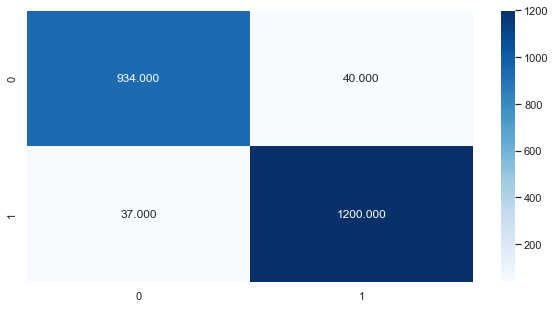


 

Model 1 starting 
Model taken is LogisticRegression 
Test Accuracy is 93.76% 

Execution time  is 0.09 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.94      0.92      0.93       974
    phishing       0.94      0.95      0.94      1237

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211


 Confusion_matrix 


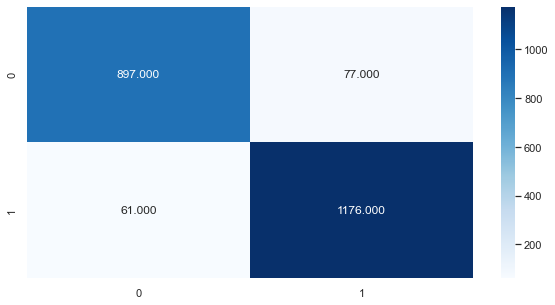


 

Model 2 starting 
Model taken is Random Forest Classifier 
Test Accuracy is 97.38% 

Execution time  is 0.37 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.98      0.96      0.97       974
    phishing       0.97      0.98      0.98      1237

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211


 Confusion_matrix 


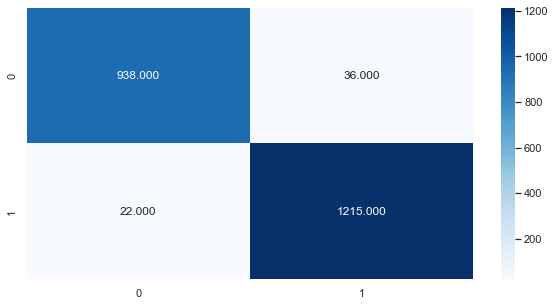


 

Model 3 starting 
Model taken is SVC 
Test Accuracy is 96.11% 

Execution time  is 1.45 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.97      0.95      0.96       974
    phishing       0.96      0.97      0.97      1237

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211


 Confusion_matrix 


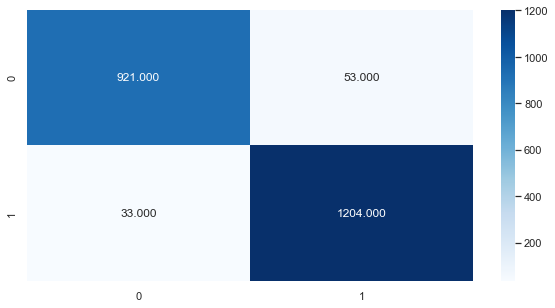


 

Model 4 starting 
Model taken is Gaussian NB 
Test Accuracy is 62.96% 

Execution time  is 0.01 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.54      1.00      0.70       974
    phishing       1.00      0.34      0.51      1237

    accuracy                           0.63      2211
   macro avg       0.77      0.67      0.60      2211
weighted avg       0.80      0.63      0.59      2211


 Confusion_matrix 


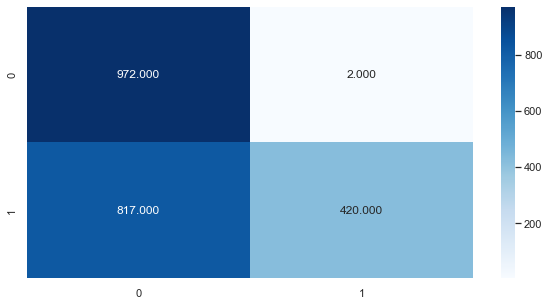


 

Model 5 starting 
Model taken is KNeighbors Classifier 
Test Accuracy is 95.79% 

Execution time  is 0.36 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.96      0.94      0.95       974
    phishing       0.96      0.97      0.96      1237

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211


 Confusion_matrix 


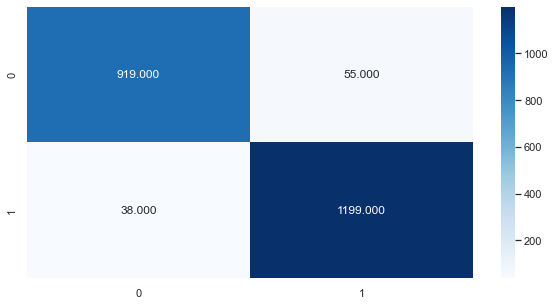


 

Model 6 starting 
Model taken is AdaBoost Classifier 
Test Accuracy is 94.08% 

Execution time  is 0.20 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.94      0.92      0.93       974
    phishing       0.94      0.95      0.95      1237

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211


 Confusion_matrix 


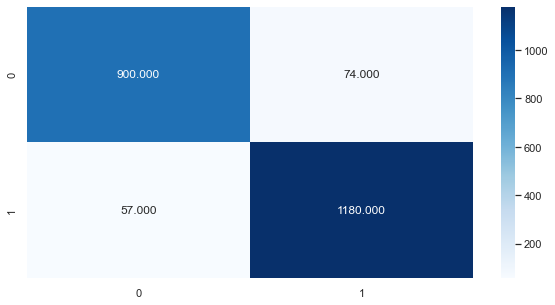


 

Model 7 starting 
Model taken is MLPClassifier 
Test Accuracy is 96.20% 

Execution time  is 6.65 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.95      0.96      0.96       974
    phishing       0.97      0.96      0.97      1237

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211


 Confusion_matrix 


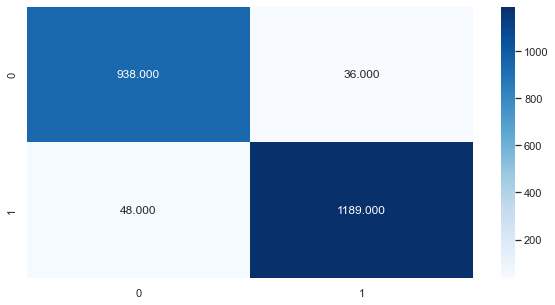


 

Model 8 starting 
Model taken is SGD Classifier 
Test Accuracy is 90.95% 

Execution time  is 0.04 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.85      0.97      0.90       974
    phishing       0.97      0.86      0.91      1237

    accuracy                           0.91      2211
   macro avg       0.91      0.92      0.91      2211
weighted avg       0.92      0.91      0.91      2211


 Confusion_matrix 


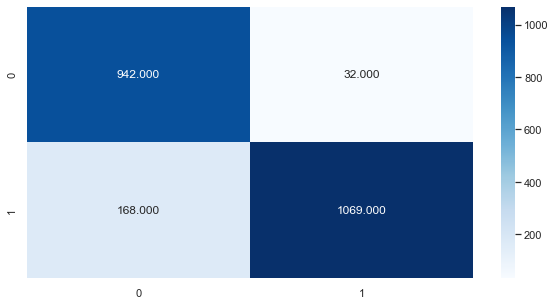


 

Model 9 starting 
Model taken is Extra Trees Classifier 
Test Accuracy is 97.56% 

Execution time  is 0.40 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.97      0.97      0.97       974
    phishing       0.98      0.98      0.98      1237

    accuracy                           0.98      2211
   macro avg       0.98      0.98      0.98      2211
weighted avg       0.98      0.98      0.98      2211


 Confusion_matrix 


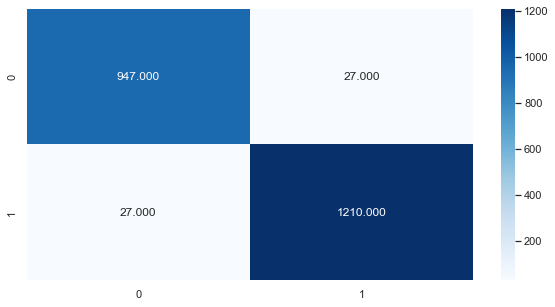


 

Model 10 starting 
Model taken is XGBClassifier 
Test Accuracy is 97.65% 

Execution time  is 0.61 sec% 

Classification_report 
              precision    recall  f1-score   support

 No phishing       0.98      0.97      0.97       974
    phishing       0.98      0.98      0.98      1237

    accuracy                           0.98      2211
   macro avg       0.98      0.98      0.98      2211
weighted avg       0.98      0.98      0.98      2211


 Confusion_matrix 


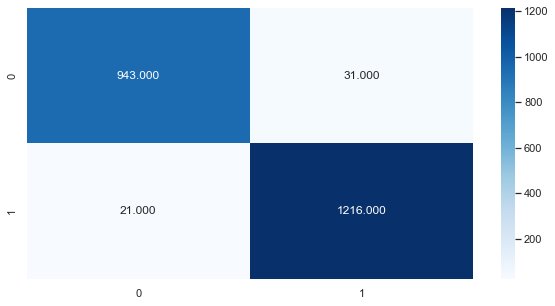

In [32]:
classification_models = [DecisionTreeClassifier,LogisticRegression,RandomForestClassifier,SVC,GaussianNB,KNeighborsClassifier,
          AdaBoostClassifier,MLPClassifier,SGDClassifier,
         ExtraTreesClassifier,xgb.XGBClassifier]

model_names= ['Decision Tree Classifier','LogisticRegression','Random Forest Classifier','SVC','Gaussian NB',
             'KNeighbors Classifier','AdaBoost Classifier','MLPClassifier','SGD Classifier','Extra Trees Classifier','XGBClassifier']
models_accuracy=[]
model_exec_time=[]
model_no=0
for m in classification_models:
    print('Model {} starting '.format(model_no))
    print('Model taken is {} '.format(model_names[model_no]))
    start= time.time()
    model_ = m()
    model_.fit(x_train, y_train)
    pred = model_.predict(x_test)
    end= time.time()
    acc = accuracy_score( y_test,pred)
    diff= end - start
    models_accuracy.append(acc)
    model_exec_time.append(diff)
    print('Test Accuracy is {:.2f}%'.format(acc*100),'\n')
    print('Execution time  is {:.2f} sec%'.format(diff),'\n')

    print('Classification_report ')
    print(classification_report(y_test, pred, target_names = ['No phishing', ' phishing']))
    print('\n','Confusion_matrix ')
    conf_matrix = confusion_matrix(y_test, pred)
    plt.figure(figsize = (10,5))
    sns.set(font_scale=1)

    plot_ = sns.heatmap(conf_matrix, annot=True,fmt= '.3f',cmap = 'Blues')
    plt.show()
    print('\n','\n')
    model_no +=1

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <p>
            <b>Insight:</b> <br>
            In the confusion matrix, the TP(True Positive) and TN(True Negative) count is better that means model predicted classes is almost same.
        </p>
    </span>    
</div>

In [33]:
accuracy_data = pd.DataFrame({"Model":model_names,
                       "Accuracy":models_accuracy}) 
accuracy_data

,Model,Accuracy
0,Decision Tree Classifier,0.965174
1,LogisticRegression,0.937585
2,Random Forest Classifier,0.973768
3,SVC,0.961104
4,Gaussian NB,0.629579
5,KNeighbors Classifier,0.957938
6,AdaBoost Classifier,0.940751
7,MLPClassifier,0.962008
8,SGD Classifier,0.909543
9,Extra Trees Classifier,0.975577


## Accuracy for each model

In [34]:
def accuracy_plot(x,y):
    plt.figure(figsize = (x,y))
    sns.set(font_scale=3)

    plots = sns.barplot("Model","Accuracy",data=accuracy_data,palette='Paired')

    plt.title(f'Multiple Bar Plot of Accuracy v/s Result',fontweight="bold")    # Title of plot
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.3f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=45, xytext=(0, 10),
                       textcoords='offset points',fontweight="bold")
    plt.xticks(rotation=70)
    plt.tight_layout()
    
    show()
    return

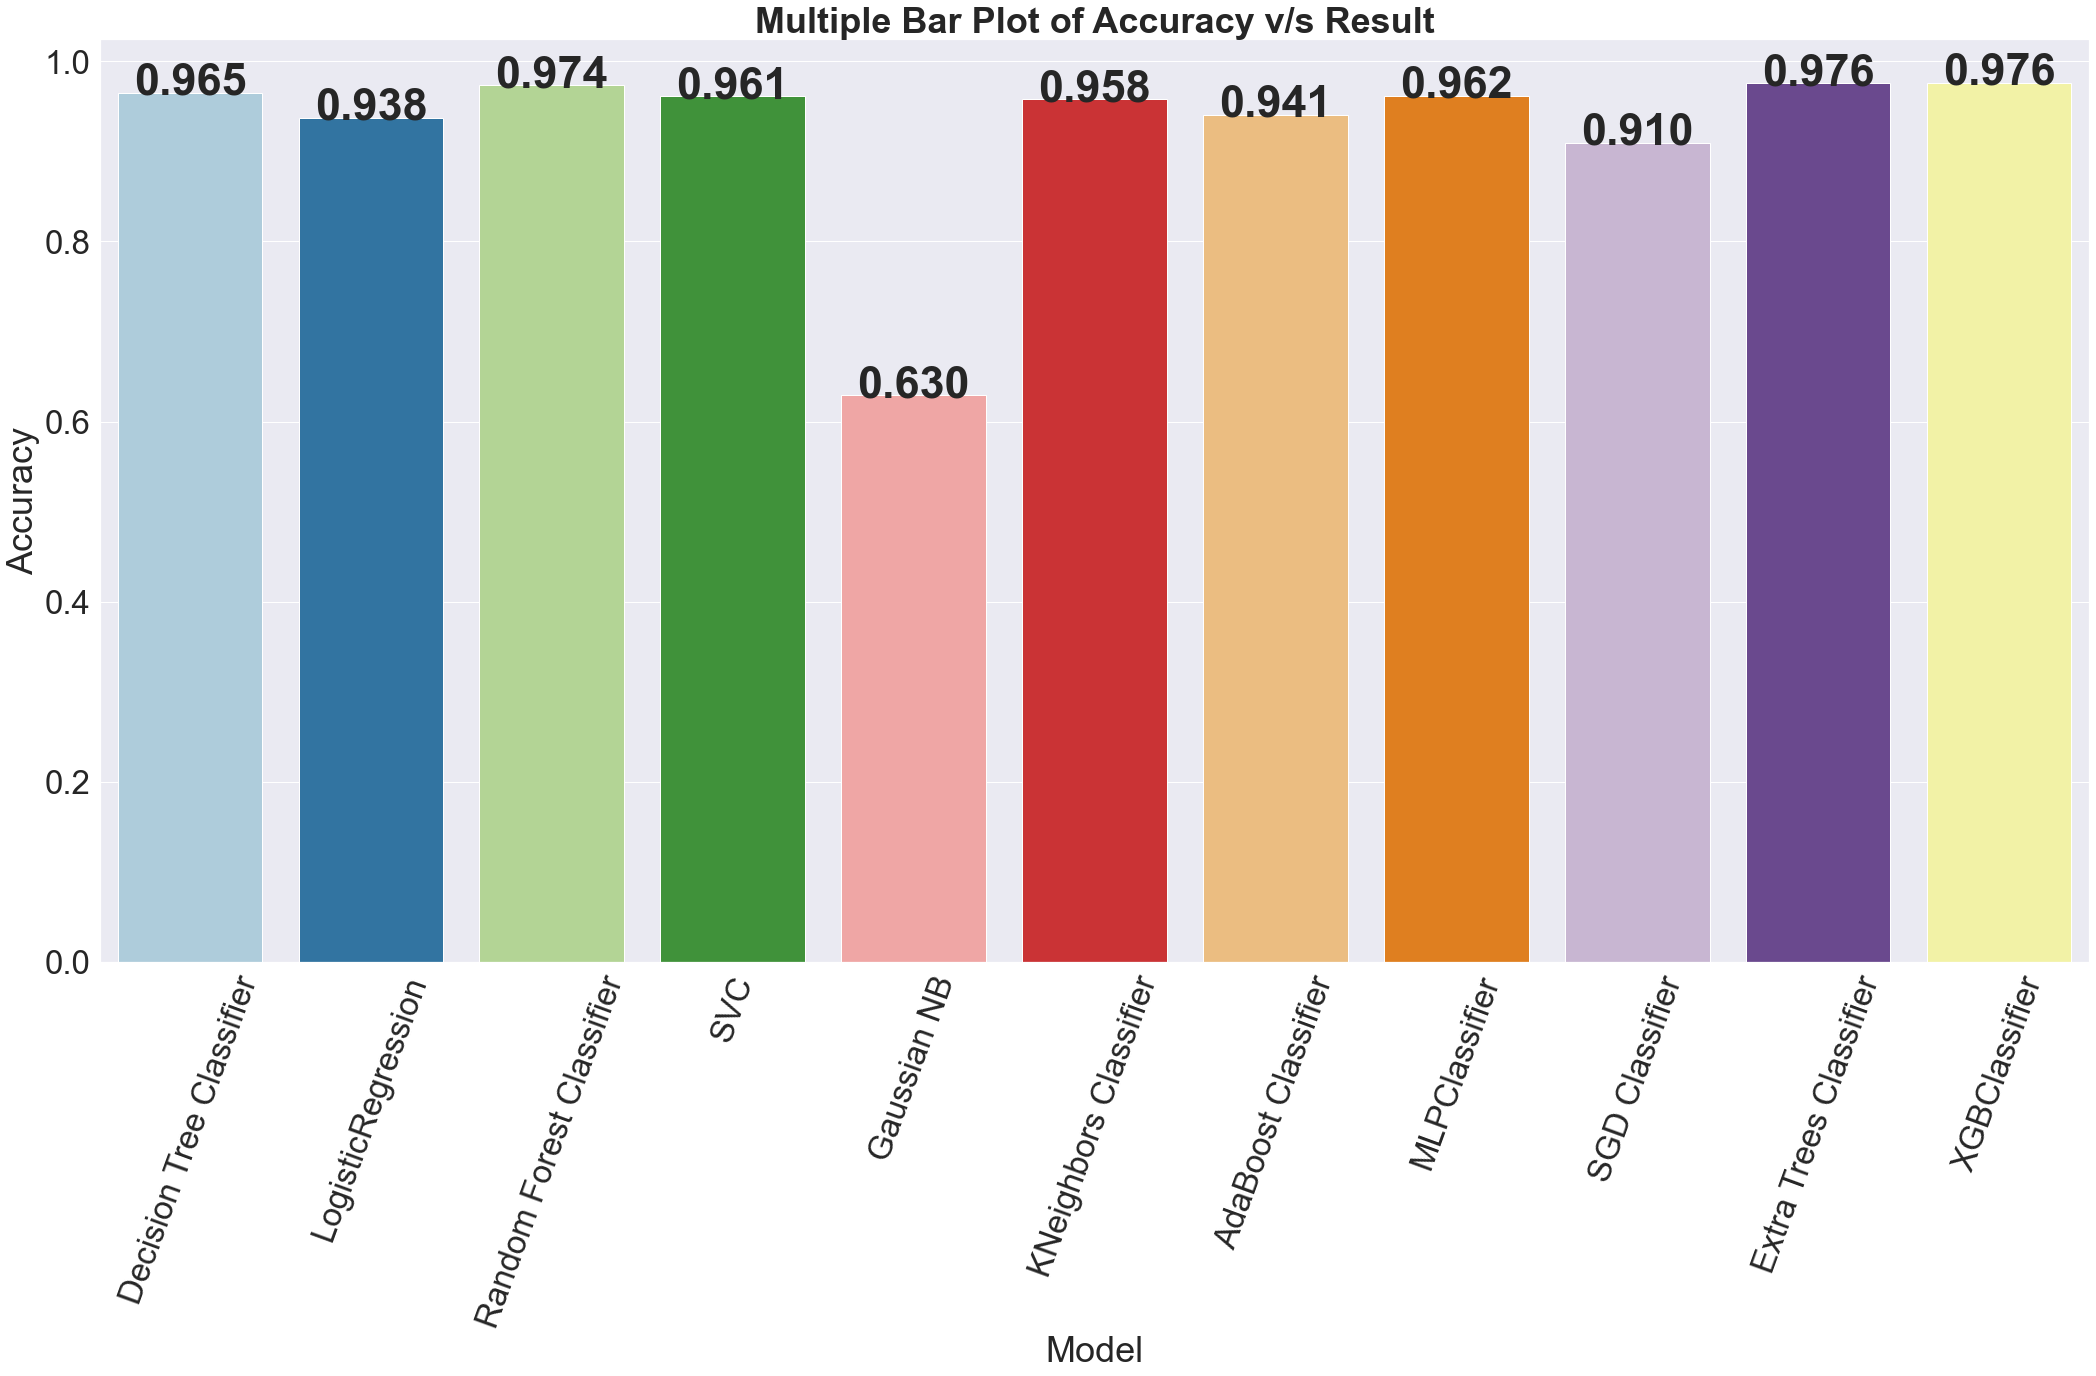

In [35]:
accuracy_plot(30,20)

In [36]:
execution_data = pd.DataFrame({"Model":model_names,
                       "execution_time":model_exec_time}) 
execution_data

,Model,execution_time
0,Decision Tree Classifier,0.017307
1,LogisticRegression,0.094134
2,Random Forest Classifier,0.366392
3,SVC,1.453652
4,Gaussian NB,0.005482
5,KNeighbors Classifier,0.360072
6,AdaBoost Classifier,0.197024
7,MLPClassifier,6.654886
8,SGD Classifier,0.042484
9,Extra Trees Classifier,0.403835


In [37]:
def execution_plot(x,y):
    plt.figure(figsize = (x,y))
    sns.set(font_scale=3)

    plots = sns.barplot("Model","execution_time",data=execution_data,palette='Paired')

    plt.title(f'Multiple Bar Plot of execution time(sec) v/s Result',fontweight="bold")    # Title of plot
    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.3f'),
                       (bar.get_x() + bar.get_width() / 2,
                        bar.get_height()), ha='center', va='center',
                       size=45, xytext=(0, 9),
                       textcoords='offset points',fontweight="bold")
    plt.xticks(rotation=70)
    plt.tight_layout()
    
    show()
    return

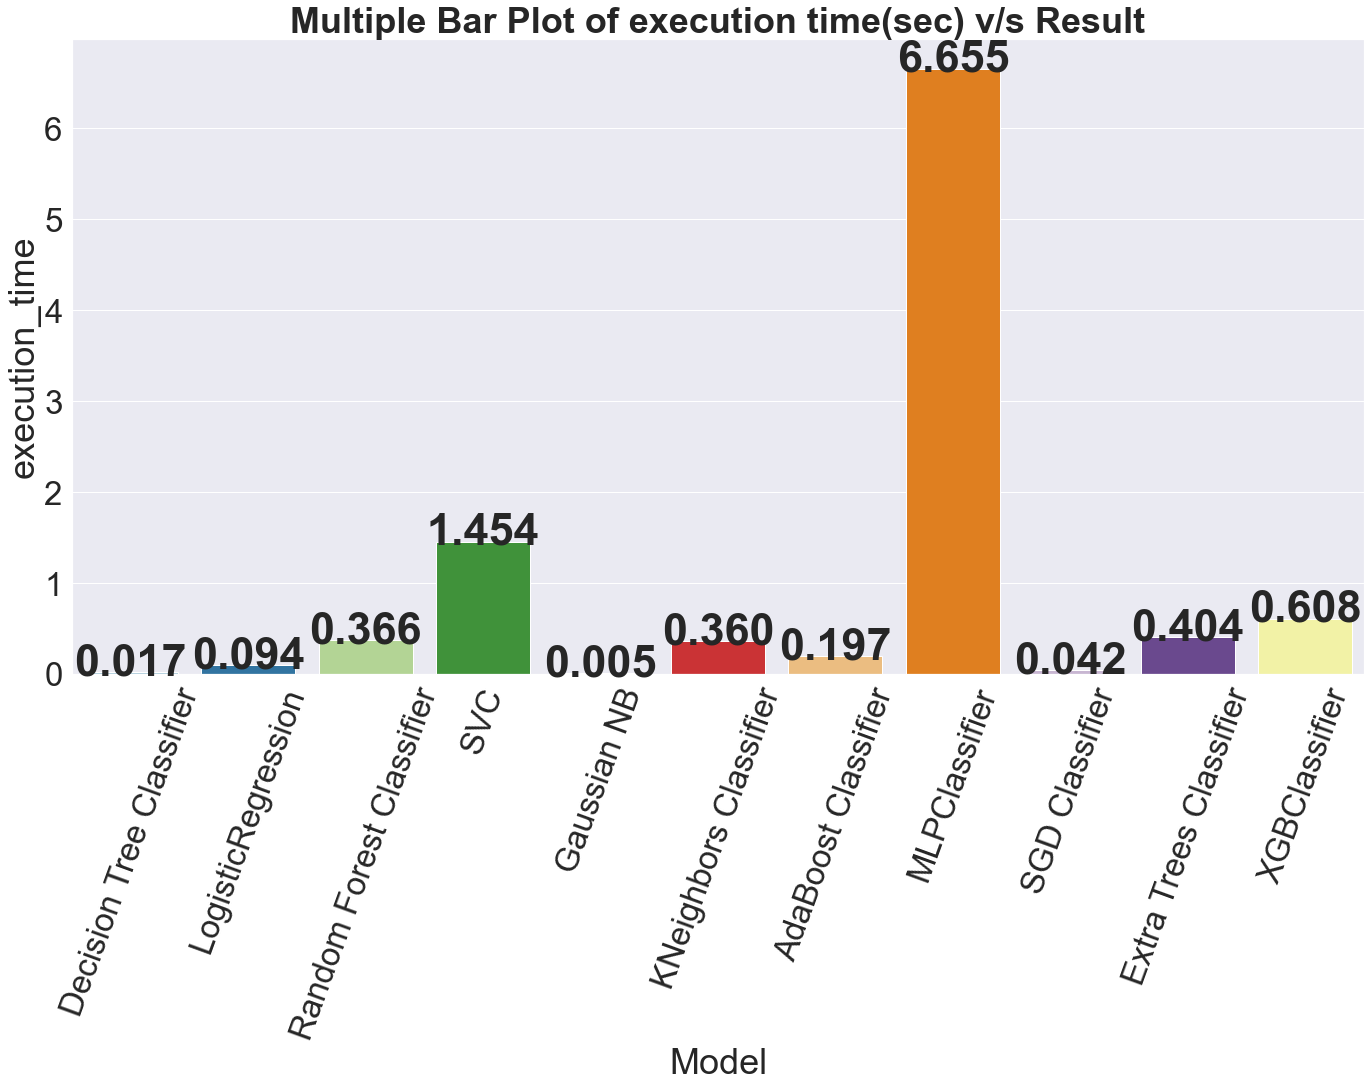

In [38]:
execution_plot(20,16)

In [39]:
pip freeze> requirements.txt


Note: you may need to restart the kernel to use updated packages.
